In [20]:
import pandas as pd
import os

n_cities = 3
species = 'BIDEP'
n_species = len(species)
results_folder = 'results'
data = [n_species*[None] for i in range(n_cities)]

for i in range(n_cities):
    for s in range(n_species):
        data[i][s] = pd.read_csv(filepath_or_buffer=os.path.join(results_folder, f'life#{species[s]}[{i}].csv'), sep=',', header=None)
        data[i][s].columns = ['Time', 'Mean', 'SD', 'CI']

print(data[0][0])

      Time    Mean         SD        CI
0      0.0    0.00   0.000000  0.000000
1      1.0    0.15   0.411329  0.081607
2      2.0    0.24   0.494822  0.098171
3      3.0    0.36   0.594928  0.118032
4      4.0    0.48   0.673900  0.133700
..     ...     ...        ...       ...
995  995.0  340.43  34.740962  6.892508
996  996.0  340.82  34.771804  6.898627
997  997.0  341.00  34.768498  6.897971
998  998.0  341.35  34.805194  6.905251
999  999.0  341.82  34.819413  6.908072

[1000 rows x 4 columns]


In [21]:
for i in range(n_cities):
    print(data[i][species.index('B')]['Mean']
        .combine(data[i][species.index('I')]['Mean'], lambda x,y: x+y)
        .combine(data[i][species.index('D')]['Mean'], lambda x,y: x-y)
        .combine(data[i][species.index('E')]['Mean'], lambda x,y: x-y))

0        0.00
1        0.99
2        1.79
3        2.53
4        3.11
        ...  
995    148.45
996    148.59
997    148.61
998    148.69
999    148.84
Name: Mean, Length: 1000, dtype: float64
0        0.00
1       -0.08
2       -0.10
3        0.01
4        0.07
        ...  
995    152.37
996    152.35
997    152.57
998    152.75
999    152.89
Name: Mean, Length: 1000, dtype: float64
0       0.00
1      -0.12
2      -0.25
3      -0.02
4       0.01
       ...  
995    56.00
996    56.26
997    56.19
998    56.57
999    56.79
Name: Mean, Length: 1000, dtype: float64


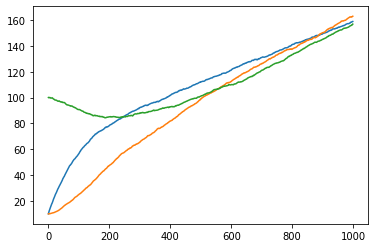

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_cities):
    ax.plot(data[i][species.index('P')]['Time'], data[i][species.index('P')]['Mean'])

plt.show()

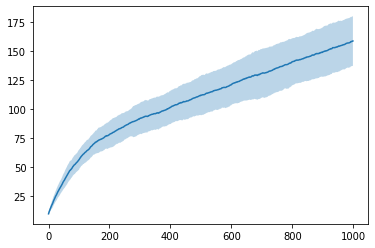

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_cities):
    time = data[i][species.index('P')]['Time']
    mean = data[i][species.index('P')]['Mean']
    sd = data[i][species.index('P')]['SD']
    ax.plot(time, mean)
    ax.fill_between(time, mean-sd, mean+sd, alpha=0.3)

plt.show()